In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm

In [4]:
df = pd.read_csv("project_data.csv")
df.head()

,Показник,Базисний період,Територіальний розріз,Тип товарів і послуг,Періодичність,1991,1991-M01,1991-M02,1991-M03,1991-M04,...,2024-M04,2024-M05,2024-M06,2024-M07,2024-M08,2024-M09,2024-M10,2024-M11,2024-M12,2025-M01
0,Базовий індекс споживчих цін,До відповідного місяця попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,104.4,104.4,105.0,105.7,106.5,107.3,108.3,109.3,110.7,111.7
1,Базовий індекс споживчих цін,До відповідного періоду попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,104.4,104.4,104.5,104.7,104.9,105.2,105.5,105.8,106.3,111.7
2,Базовий індекс споживчих цін,До грудня попереднього року,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,102.5,102.8,103.3,104.1,104.8,106.6,108.0,109.3,110.7,101.3
3,Базовий індекс споживчих цін,До попереднього місяця,Україна,Не застосовується,Місячна,NaN,NaN,NaN,NaN,NaN,...,100.7,100.3,100.5,100.7,100.7,101.7,101.3,101.2,101.3,101.3
4,Індекс споживчих цін,До відповідного місяця попереднього року,Україна,Індекс споживчих цін,Місячна,NaN,NaN,NaN,NaN,NaN,...,103.2,103.3,104.8,105.4,107.5,108.6,109.7,111.2,112.0,112.9


In [5]:
start = 1991
end = 2018
columns_to_drop = []
for i in range(start, end+1):
    columns_to_drop.append(str(i))
    for j in range(1, 13):
        if j <= 9:
            columns_to_drop.append(f"{i}-M0{j}")
        else:
            columns_to_drop.append(f"{i}-M{j}")
    

In [6]:
df_from_2019 = df.drop(columns=columns_to_drop)
# df_from_2019.to_csv('data_from_2019.csv', index=False)

form dataset only from average prices

In [7]:
df_from_2019 = df_from_2019[df_from_2019["Показник"] == "Середні споживчі ціни на товари (послуги)"]
# df_from_2019.to_csv('average_prices_from_2019.csv', index=False)

form dataset only from products for goods basket (from 2019)

Хліб(все види хлібу)\
Макарони(всі)\
Крупи(рис + гречка ...)\
Картопля\
Овочі(морква, буряк, капуста)\
Яблука\
Цукор \
Соняшникова олія \
???? М’ясо (свинина + курка+всі туші тварин)\
Мʼясні вироби (сало + ковбаса)\
Риба(морепродукти+морожена риба)\
Молоко(молоко + молоко пастеризоване)\
Вершкове масло\
Мʼякий сир\
Яйце

In [8]:
bread = ["Хліб пшеничний з борошна вищого ґатунку", "Хліб пшеничний з борошна першого ґатунку", "Хліб житній, житньо-пшеничний", "Батон"]
cereals = ["Рис", "Крупи манні", "Крупи гречані", "Крупи ячні", "Пшоно"]
# "Крупи пшеничні" - дропнула бо багато missing values
meat = ["Яловичина", "Свинина", "Птиця (тушки курячі)", "Філе куряче"]
pasta = ["Макаронні вироби з м’яких сортів пшениці"]
kybasa = ["Ковбаси варені першого ґатунку", "Сало"]
fish = ["Риба морожена"]
milk = ["Молоко пастеризоване жирністю до 2,6% включно"]
# ??? куди діти сметану "Сметана жирністю до 15% включно"
dairy = ["Сметана жирністю до 15% включно", "Масло вершкове"]
cheese = ["Сири м’які жирні"]
eggs = ["Яйця"]
sun_oli = ["Олія соняшникова"]
fruits = ["Яблука"]
vege = ["Капуста білокачанна", "Цибуля ріпчаста", "Буряк", "Морква"]
potato = ["Картопля"]
sugar = ["Цукор"]
# Молочні суміші для дитячого харчування (треба ?? думаю ні)

all_lists = [bread, cereals, meat, pasta, kybasa, fish, milk, dairy, cheese, 
             eggs, sun_oli, fruits, vege, potato, sugar]

all_products = sum(all_lists, [])

avg_prices = df_from_2019[df_from_2019["Тип товарів і послуг"].isin(all_products)]

# avg_prices.to_csv('average_basket_prices.csv', index=False)

In [9]:
avg_prices["Територіальний розріз"].unique()

array(['Україна', 'Вінницька', 'Волинська', 'Дніпропетровська',
       'Донецька', 'Житомирська', 'Закарпатська', 'Запорізька',
       'Івано-Франківська', 'Київська', 'Кіровоградська', 'Луганська',
       'Львівська', 'Миколаївська', 'Одеська', 'Полтавська', 'Рівненська',
       'Сумська', 'Тернопільська', 'Харківська', 'Херсонська',
       'Хмельницька', 'Черкаська', 'Чернівецька', 'Чернігівська', 'Київ'],
      dtype=object)

Filling missing value

In [10]:
num_cols = df_from_2019.columns[5:]

avg_prices[num_cols] = avg_prices[num_cols].apply(pd.to_numeric, errors='coerce')

avg_prices[num_cols] = avg_prices[num_cols].interpolate(method='linear', axis=1).round(2)

avg_prices.to_csv('filled_data.csv', index=False)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/726599793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_prices[num_cols] = avg_prices[num_cols].apply(pd.to_numeric, errors='coerce')
/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/726599793.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_prices[num_cols] = avg_prices[num_cols].interpolate(method='linear', axis=1).round(2)


In [11]:
# avg_prices.isnull().sum().to_dict()
# missing_values = {col: count for col, count in avg_prices.isnull().sum().to_dict().items() if count >= 1}
# missing_values 

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


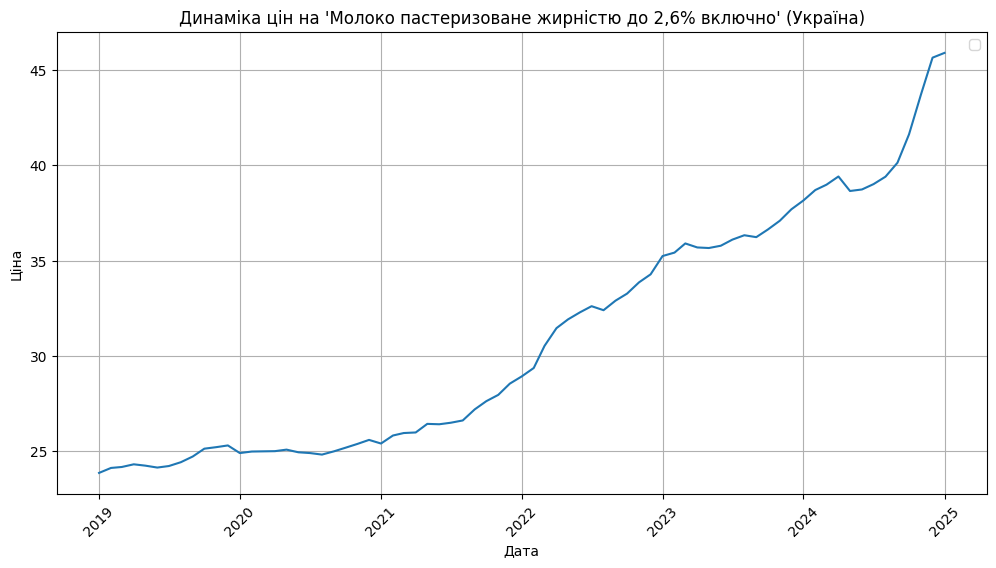

In [12]:
def price_ploting(df, product_name, region):

    row = df[(df["Тип товарів і послуг"] == product_name) & 
                    (df["Територіальний розріз"] == region)]

    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")  # "2019-M01" → "2019-01"

    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices)
    plt.xlabel("Дата")
    plt.ylabel("Ціна")
    plt.title(f"Динаміка цін на '{product_name}' ({region})")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid()
    plt.show()

product_name = "Молоко пастеризоване жирністю до 2,6% включно"
region = "Україна"
price_ploting(avg_prices, product_name, region)

    


apply moving average for milk

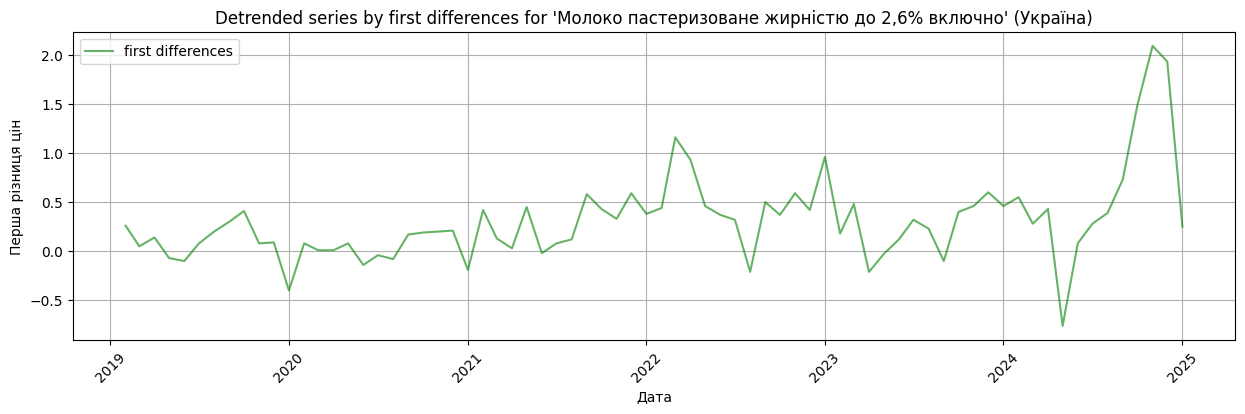

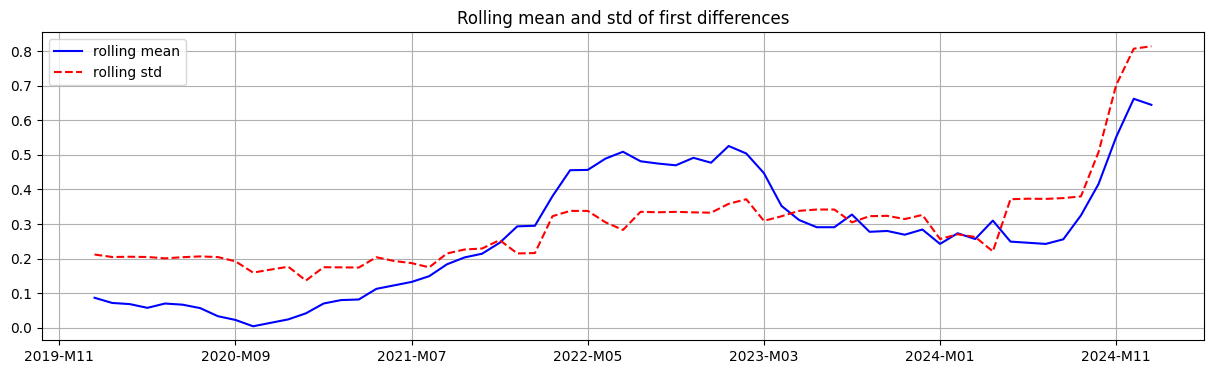

In [13]:
def plotting_moving_average(df, window_size, product_name, region):
    # row = df[(df["Тип товарів і послуг"] == product_name) & 
    #                 (df["Територіальний розріз"] == region)]

    # price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    # prices = row[price_columns].iloc[0]
    # dates = pd.to_datetime(price_columns, format="%Y-M%m")

    # # window_size = 12

    # plt.figure(figsize=(15, 4))
    # plt.plot(dates, prices, label="original prices", alpha=0.6)

    # rolling_mean = prices.rolling(window_size).mean().shift(-window_size // 2)
    # plt.plot(dates, rolling_mean, label=f"mooving average ({window_size} months)", color="blue")

    # expanding_mean = prices.expanding().mean()
    # plt.plot(dates, expanding_mean, label="expanding_mean", color="red", linestyle="--")

    # plt.xlabel("Дата")
    # plt.ylabel("Ціна")
    # plt.title(f"Динаміка цін на '{product_name}' ({region}) - mooving average")
    # plt.legend()
    # plt.grid()
    # plt.xticks(rotation=45)
    # plt.show()
    # return rolling_mean 
    row = df[(df["Тип товарів і послуг"] == product_name) & 
             (df["Територіальний розріз"] == region)]
    
    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m")
    
    first_diffs = prices.diff(1)
    
    plt.figure(figsize=(15, 4))
    plt.plot(dates, first_diffs, label="first differences", alpha=0.6, color='green')
    plt.title(f"Detrended series by first differences for '{product_name}' ({region})")
    plt.xlabel("Дата")
    plt.ylabel("Перша різниця цін")
    plt.legend()
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()
    
    plt.figure(figsize=(15, 4))
    first_diffs.rolling(12).mean().plot(label='rolling mean', color='blue')
    first_diffs.rolling(12).std().plot(label='rolling std', color='red', linestyle='--')
    plt.title("Rolling mean and std of first differences")
    plt.legend()
    plt.grid()
    plt.show()
    
    return first_diffs


product_name = "Молоко пастеризоване жирністю до 2,6% включно"
region = "Україна"
detrended_milk = plotting_moving_average(avg_prices, 12, product_name, region)

ЦУКОР

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


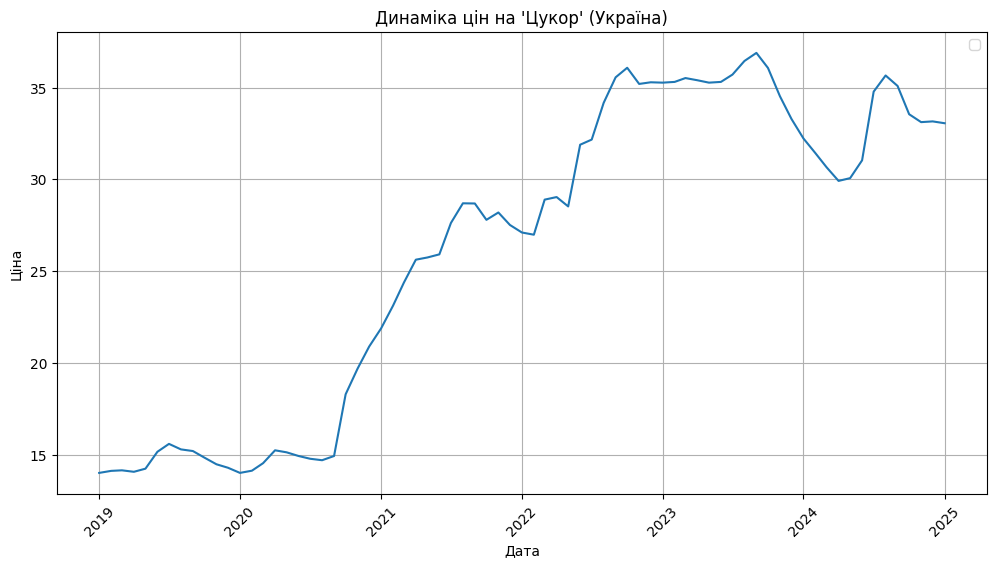

In [14]:
product_name = "Цукор"
region = "Україна"
price_ploting(avg_prices, product_name, region)


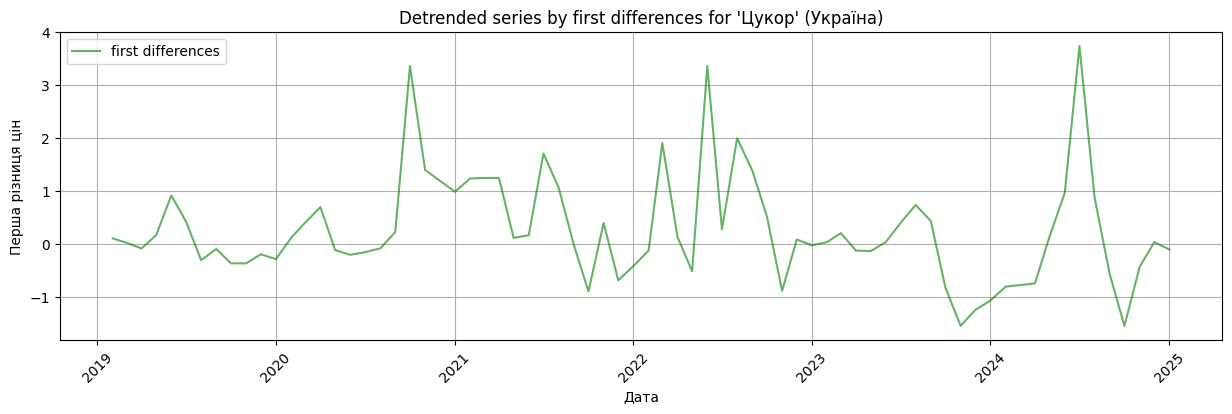

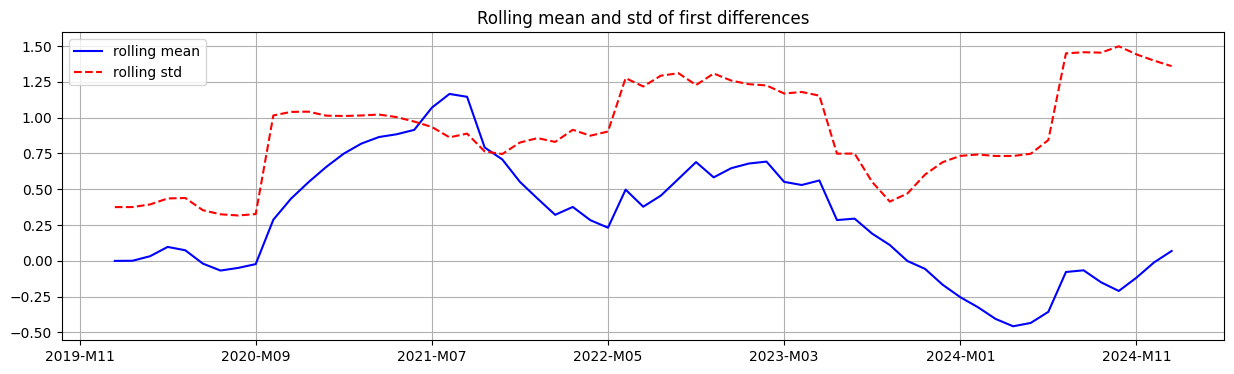

In [15]:
detrended_sugar = plotting_moving_average(avg_prices, 12, product_name, region)

Картопля

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


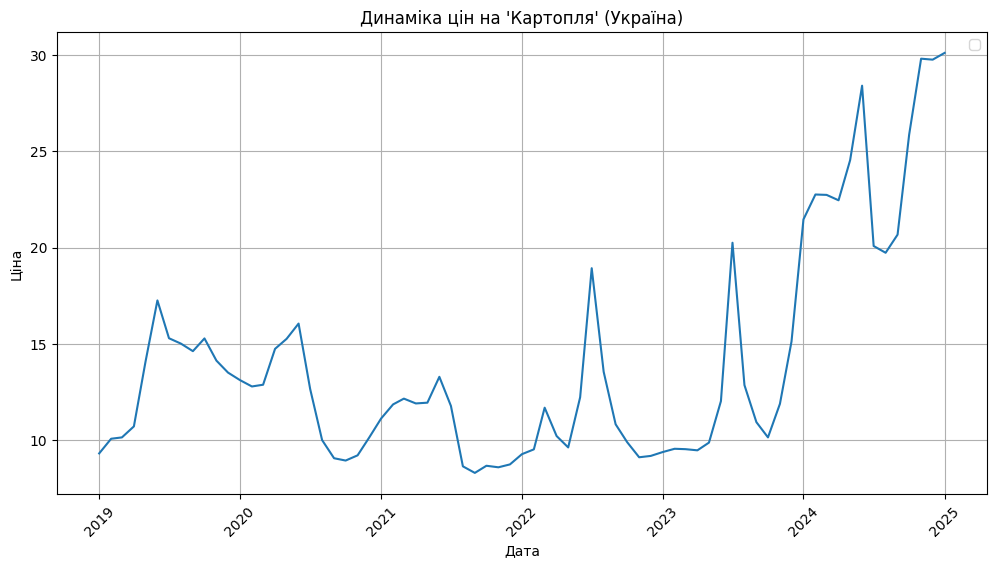

In [16]:
product_name = "Картопля"
region = "Україна"
price_ploting(avg_prices, product_name, region)

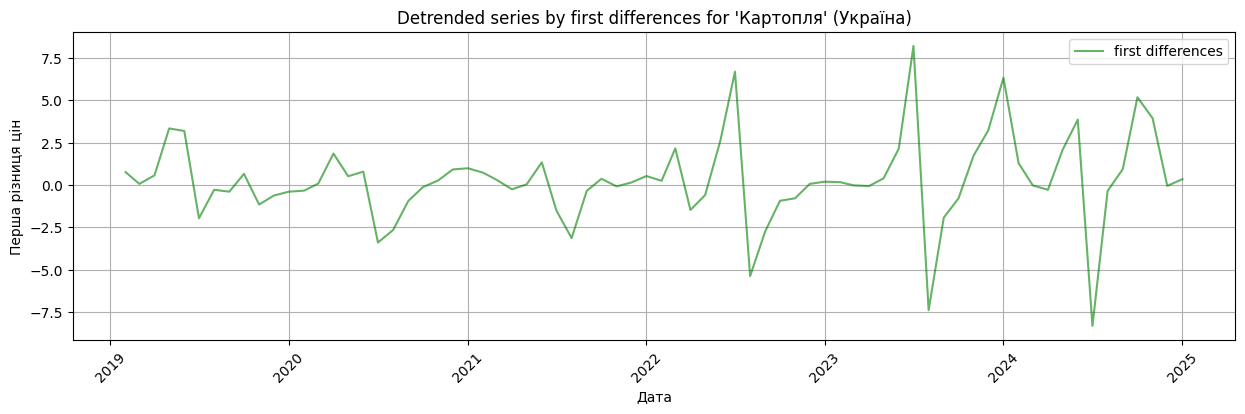

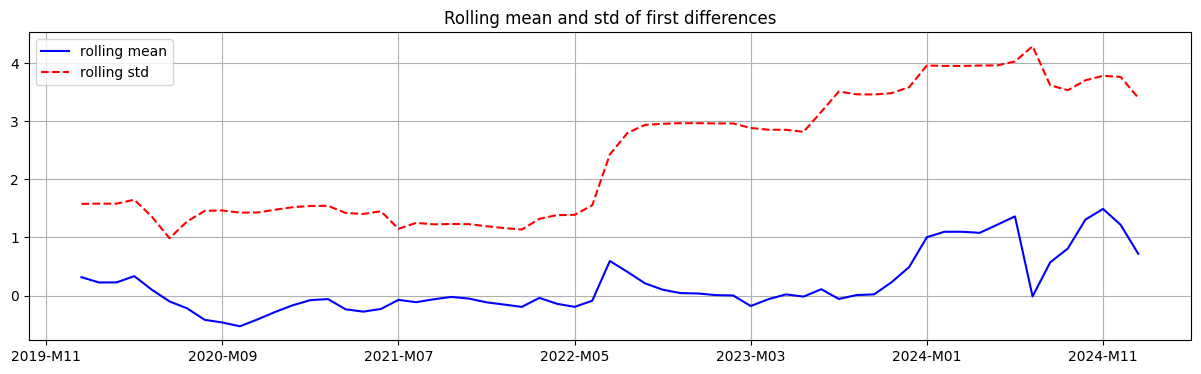

In [17]:
detrended_potato = plotting_moving_average(avg_prices, 12, product_name, region)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


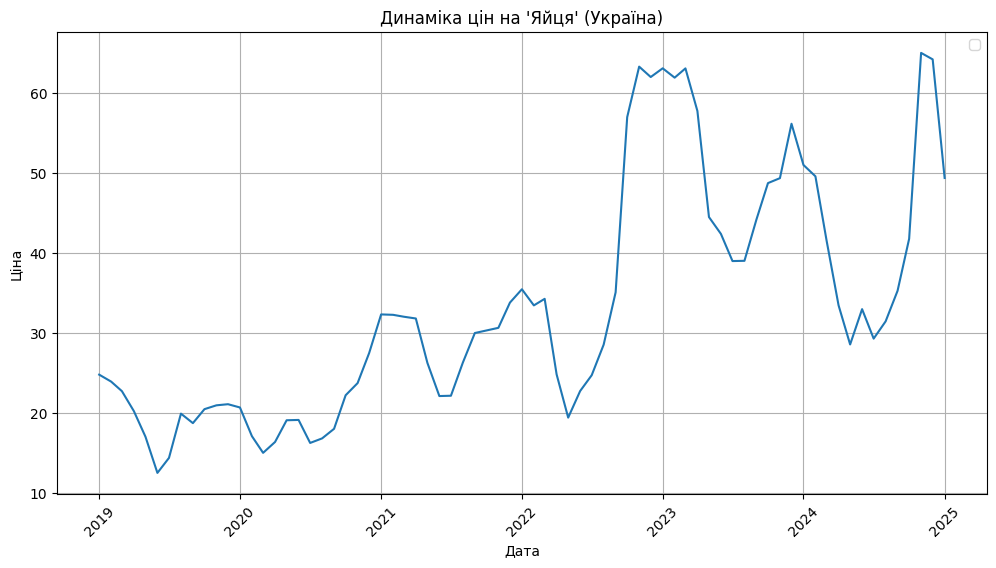

In [18]:
product_name = "Яйця"
region = "Україна"
price_ploting(avg_prices, product_name, region)

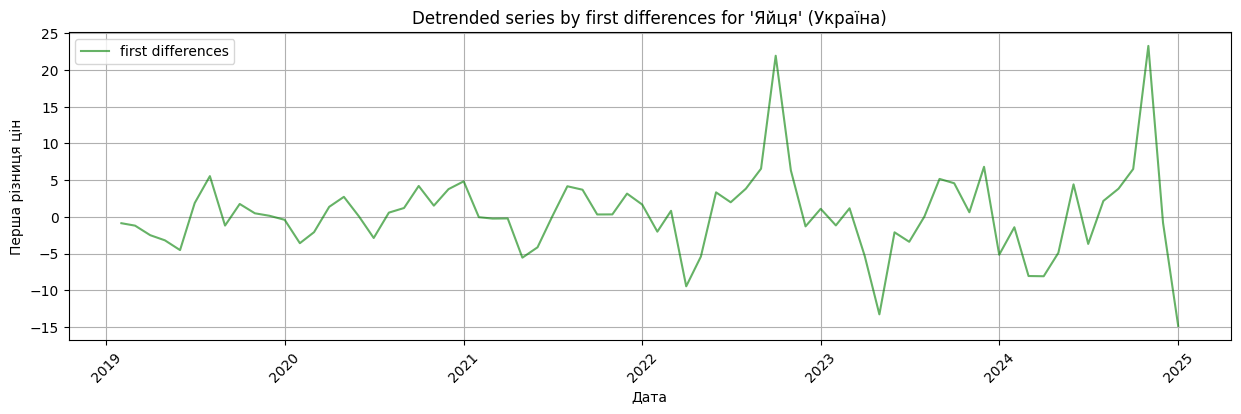

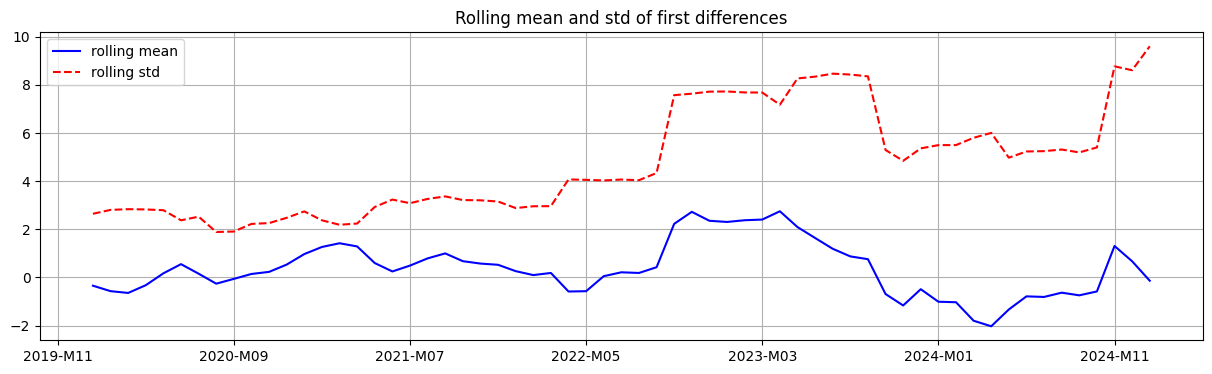

In [19]:
detrended_eggs = plotting_moving_average(avg_prices, 12, "Яйця", "Україна")

#продукти обʼєднані по групам (почищена і погрупована дата)

In [20]:
avg_prices_grouped = avg_prices

bread_mapping = {el: "Хліб" for el in bread}
cereals_mapping = {el: "Крупи" for el in cereals}
# . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
meat_mapping = {el: "Мʼясо свійських тварин та птиці" for el in meat}
pasta_mapping = {el: "Макарони" for el in pasta}
kubasa_mapping = {el: "Ковбасні вироби" for el in kybasa}
fish_mapping = {el: "Риба" for el in fish}
dairy_mapping = {el: "Молочні продукти" for el in dairy}
cheese_mapping = {el: "Сир" for el in cheese}
vege_mapping = {el: "Овочі" for el in vege}

all_mapping = [bread_mapping, cereals_mapping, meat_mapping, pasta_mapping, kubasa_mapping, fish_mapping, dairy_mapping, cheese_mapping, vege_mapping]



for mapping in all_mapping:
    avg_prices_grouped['Тип товарів і послуг'] = avg_prices_grouped['Тип товарів і послуг'].replace(mapping)

result = avg_prices_grouped.groupby(['Територіальний розріз', 'Тип товарів і послуг']).mean(numeric_only=True).round(2)

result = result.reset_index()

result.to_csv("grouped_bread.csv")



/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/2624325709.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  avg_prices_grouped['Тип товарів і послуг'] = avg_prices_grouped['Тип товарів і послуг'].replace(mapping)


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


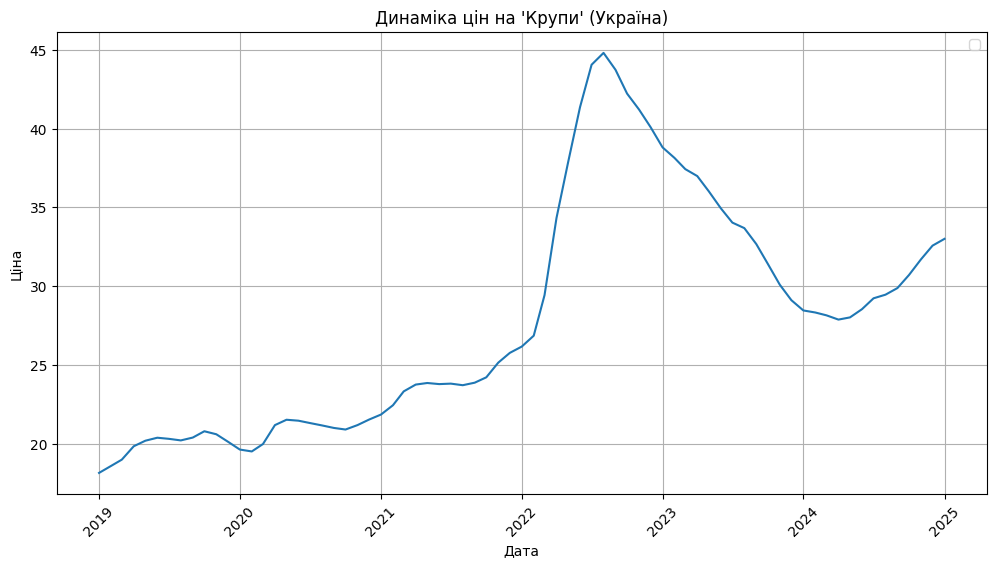

In [21]:
product_name = "Крупи"
region = "Україна"
price_ploting(result, product_name, region)

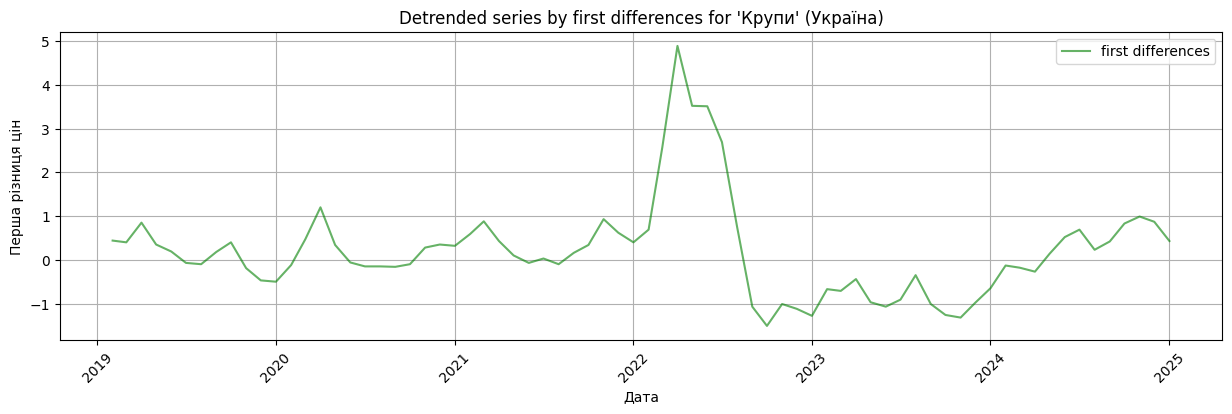

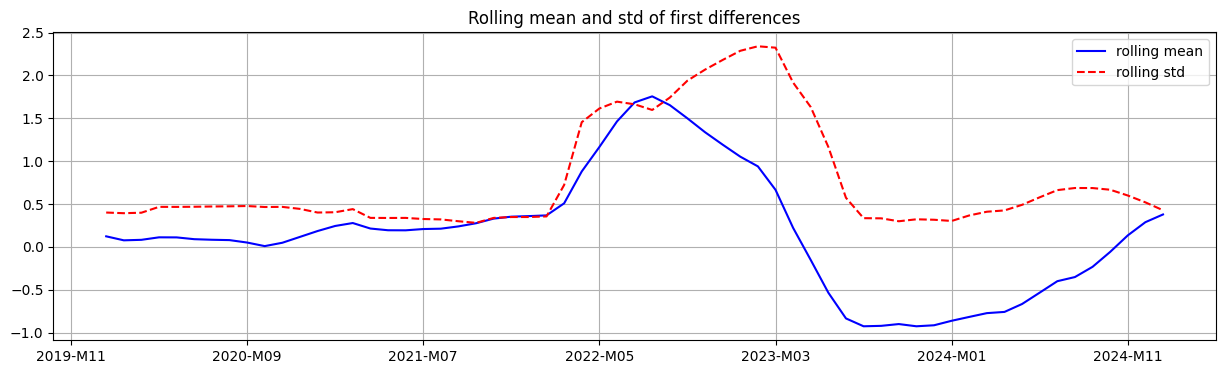

In [22]:
detrended_cereals = plotting_moving_average(result, 12, "Крупи", region)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


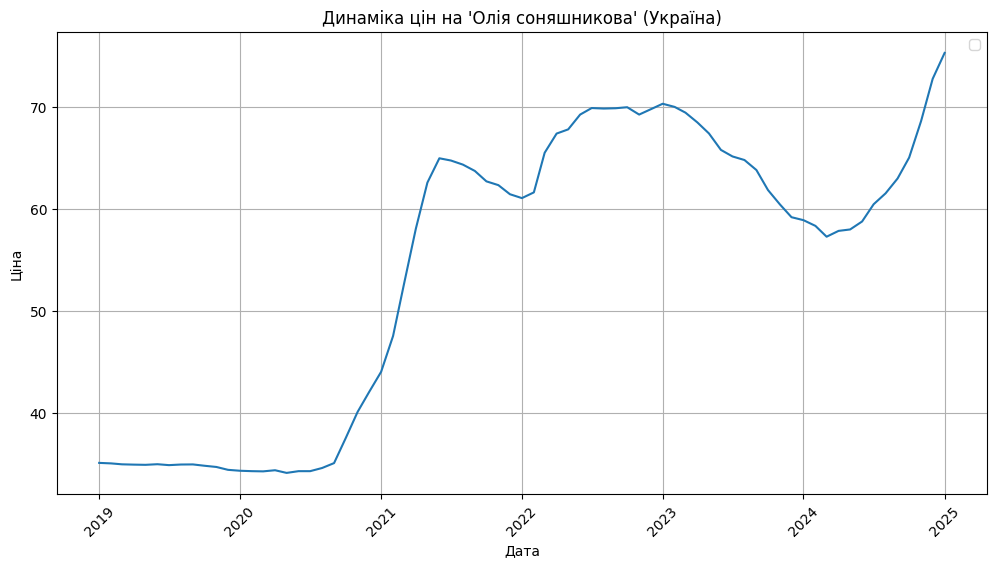

In [23]:
product_name = "Олія соняшникова"
region = "Україна"
price_ploting(result, product_name, region)

In [24]:
def test_stationarity(df, product_name, region):
    row = df[(df["Тип товарів і послуг"] == product_name) & 
                    (df["Територіальний розріз"] == region)]

    price_columns = [col for col in df.columns if col[:4].isdigit() and "-M" in col]
    prices = row[price_columns].iloc[0]
    dates = pd.to_datetime(price_columns, format="%Y-M%m") 
    result_adf = adfuller(prices )
    result_kpss = kpss(prices, regression='c', nlags="auto")

    print("ADF-test:")
    print(f"test statistic: {result_adf[0]:.4f}")
    print(f"p-value: {result_adf[1]:.4f}")
    print(f"critical values: {result_adf[4]}")
    print("stationary" if result_adf[1] < 0.05 else "Non-stationary")

    print("\nKPSS Test:")
    print(f"test statistic: {result_kpss[0]:.4f}")
    print(f"p-value: {result_kpss[1]:.4f}")
    print(f"critical values: {result_kpss[3]}")
    print("non-stationary" if result_kpss[1] < 0.05 else "Stationary")


test_stationarity(avg_prices, product_name, region)

ADF-test:
test statistic: -1.1405
p-value: 0.6987
critical values: {'1%': np.float64(-3.5274258688046647), '5%': np.float64(-2.903810816326531), '10%': np.float64(-2.5893204081632653)}
Non-stationary

KPSS Test:
test statistic: 0.9903
p-value: 0.0100
critical values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
non-stationary


/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/2149144738.py:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result_kpss = kpss(prices, regression='c', nlags="auto")


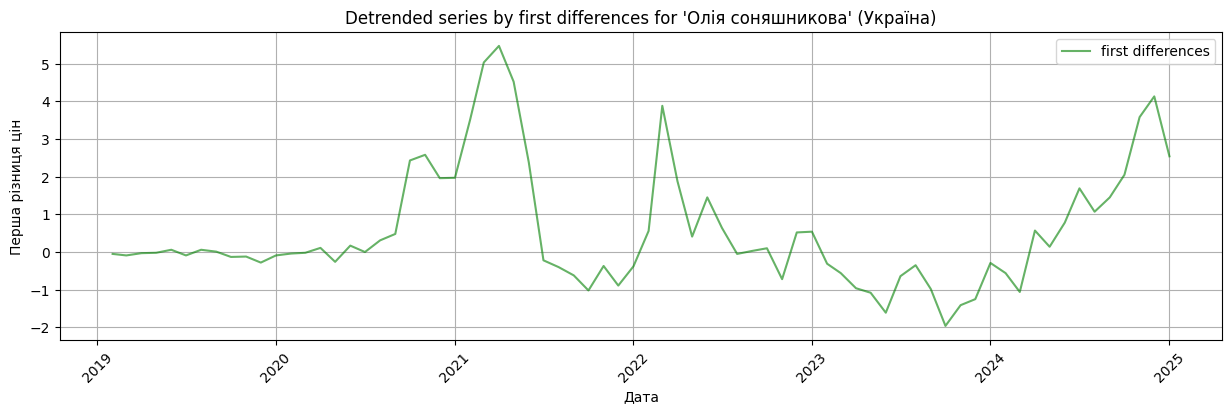

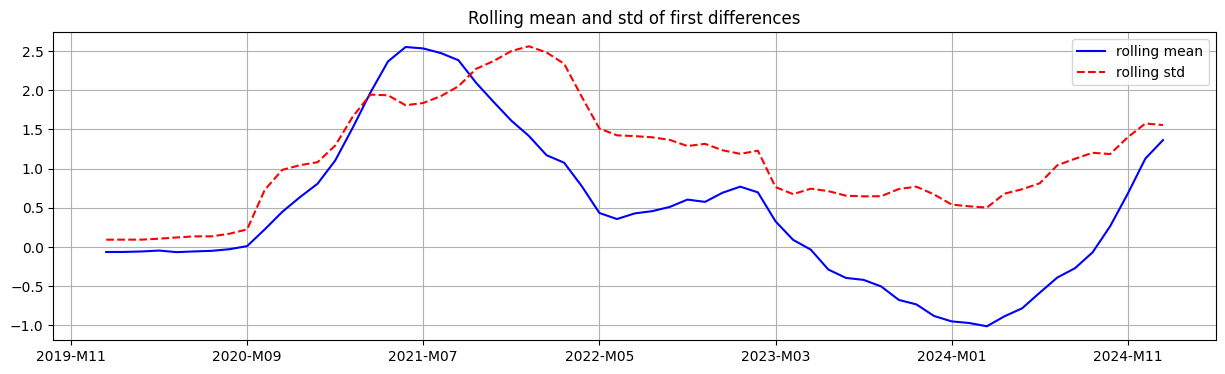

In [25]:
detrended_oil = plotting_moving_average(result, 12, product_name, region)

/var/folders/lr/g27h7d295svcp5fxx4r1hn080000gn/T/ipykernel_35019/1361302710.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


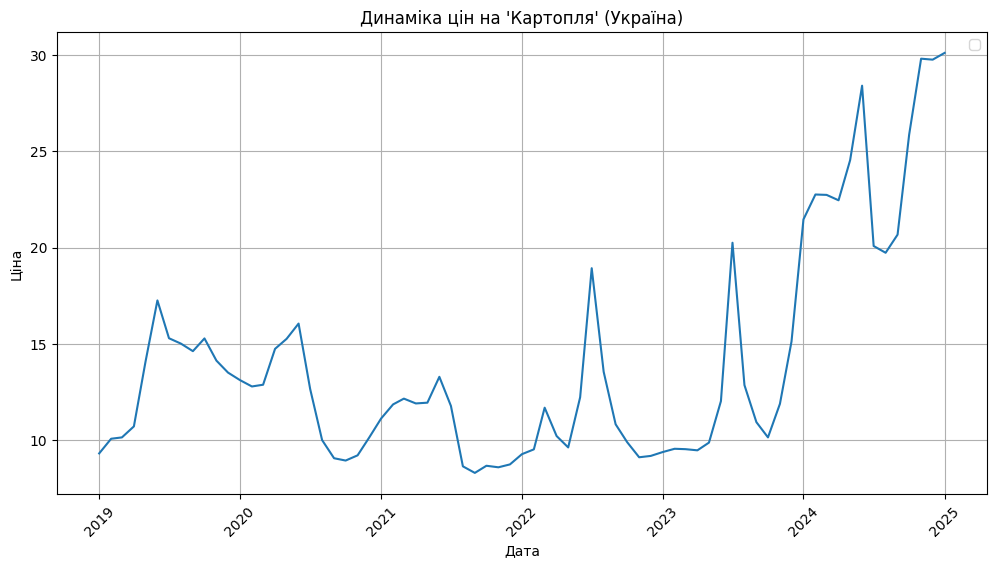

In [26]:
product_name = "Картопля"
region = "Україна"
price_ploting(result, product_name, region)

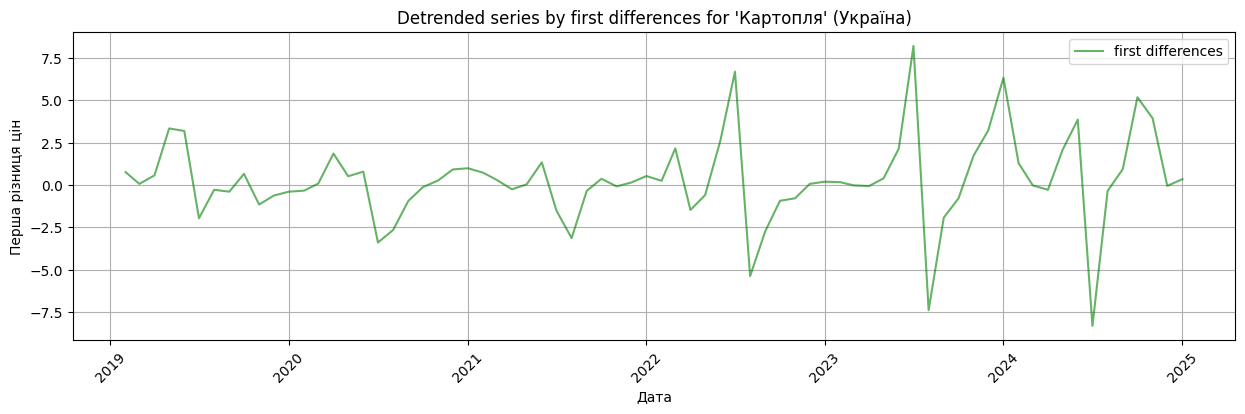

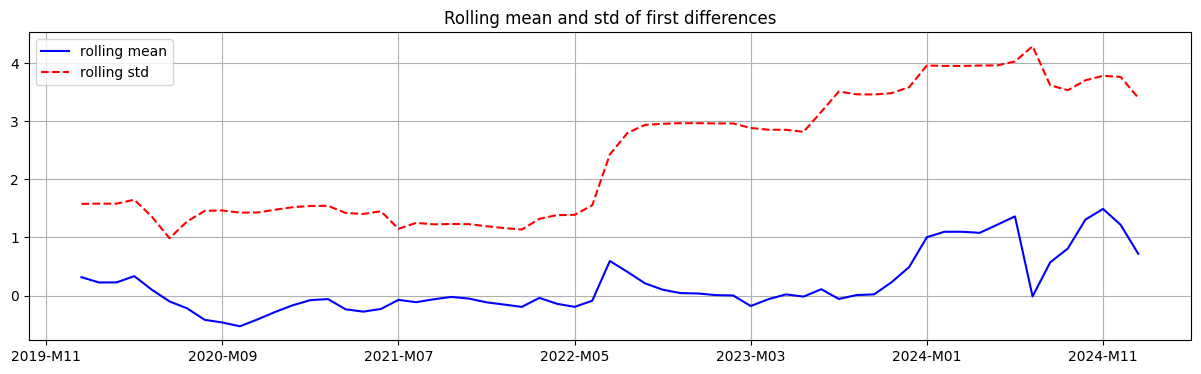

In [27]:
detrended_potato = plotting_moving_average(result, 12, product_name, region)

In [28]:
len(detrended_potato.dropna().head())

5